<a href="https://colab.research.google.com/github/act-moises/diplomado/blob/main/C%C3%B3digo_An%C3%A1lisis_de_componentes_principales_para_una_base_de_riesgo_reproductivo_en_mujeres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código limpio

In [ ]:
#librerías necesarias para el análisis del PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Descargamos datos

#Primero los datos sobre los que haremos el PCA
df = pd.read_csv('P2_DBNCM.csv')
#df.head()
#Los datos de calificacion de riesgo
df_2 = pd.read_csv('P2_DB CM.csv')
#df_2.head()

calificacion_riesgo = df_2['V11']


df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0.041667,0.78,0.0,0.10,1.00,1.00,0.0,0.06,0.00000,0.000572
1,0.041667,0.78,0.0,0.08,1.00,0.99,0.0,0.06,0.09375,0.000000
2,0.083333,0.76,0.0,0.17,0.95,1.00,0.0,0.05,0.09375,0.000000
3,0.041667,0.78,0.0,0.17,1.00,1.00,0.0,0.05,0.12500,0.001145
4,0.041667,0.79,0.0,0.17,0.90,1.00,0.0,0.07,0.06250,0.000000


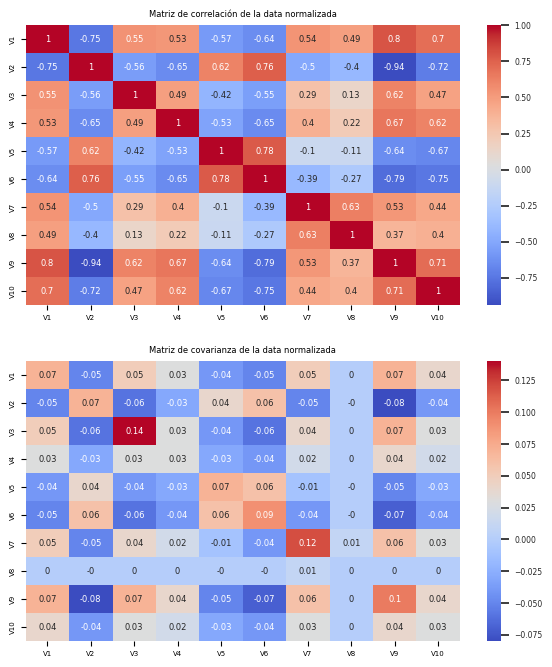

In [ ]:
#Calculamos la matríz de correlación de la data original
corr_matrix = df.corr()

#Redondeamos a dos decimales (Solo para su visualizacion)
corr_matrix = corr_matrix.round(2)

#Creamos figura y ejes
fig,ax = plt.subplots(2,1,figsize=(7,8))

#Cambiamos tamanio de letras
sns.set(font_scale=0.5)

#Mostramso mapa de calor
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,ax=ax[0])

#Añadimos titulo de matriz de correlacion
ax[0].set_title('Matriz de correlación de la data normalizada')
#Cambiamos el tamanio de los xticks
ax[0].set_xticklabels(ax[0].get_xticklabels(),size=5)
#Cambiamos el tamanio de los yticks
ax[0].set_yticklabels(ax[0].get_yticklabels(),size=5)

#reptimos graficacion pero con matriz de covarianzas
cov_matrix = df.cov()
cov_matrix = cov_matrix.round(2)
#Mostramos la matriz de correlación
#cov_matrix
sns.set(font_scale=0.5)
sns.heatmap(cov_matrix,cmap='coolwarm',annot=True,ax=ax[1])
#Añadimos titulo de matriz de covarianza
ax[1].set_title('Matriz de covarianza de la data normalizada')
#Cambiamos el tamanio de los xticks
ax[1].set_xticklabels(ax[1].get_xticklabels(),size=5)
#Cambiamos el tamanio de los yticks
ax[1].set_yticklabels(ax[1].get_yticklabels(),size=5)


#Mostramos
plt.show()

#Volvemos a calcular las matrices pero sin redondeos
corr_matrix = df.corr()
cov_matrix = df.cov()

## Se usó matriz de correlacion

Como en este punto ya se estableció que se va a usar la matriz de correlación para el análisis de componentes principales, se procede a el cálculo de sus vectores y valores propios

Eigenvalores:
	6.044300082684753
	1.3786896992604802
	0.6734448112145752
	0.04440176222694352
	0.5113948602775569
	0.14008074496332834
	0.3741865800169753
	0.2335845531802086
	0.3107633186003643
	0.28915358757481024
----------------------------------------------------------------------------------------------------
Eigenvectores:


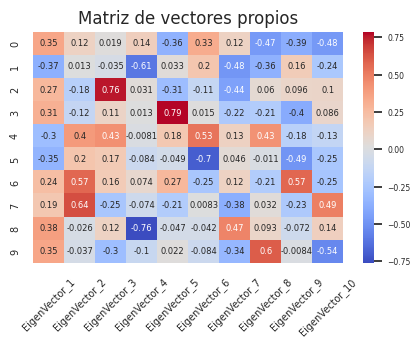

In [ ]:
#Se calculan los vectores y valores propios de la matriz de correlación
#Calculamos eigen vectores de la matriz de corr_matrix
eigenvalues,eigenvectors = np.linalg.eig(corr_matrix)

print('Eigenvalores:')
for valor in eigenvalues:
    print('\t' + str(valor))

print('-'*100)
print('Eigenvectores:')
pd_eigenvectores = pd.DataFrame(eigenvectors)
#Cambiamos nombres de columnas:
pd_eigenvectores.columns = ['EigenVector_' + str(i) for i in range(1,11)]
pd_eigenvectores
#eigenvalues,eigenvectors

#Mostramos esta matriz en un mapa de calor
fig,ax = plt.subplots(figsize=(5,3))
sns.set(font_scale=0.5)
sns.heatmap(pd_eigenvectores,cmap='coolwarm',annot=True,ax=ax)
sns.set(font_scale=1)

plt.title('Matriz de vectores propios')

#Rotamos los xticks
plt.xticks(rotation=45,size=7)
plt.yticks(size=7)
plt.show()

In [ ]:
#Este bloque de código es opcional, pero era para validar que los valores
#y vectores propios estubieran correctos

#multiplicamos el primer eigenvector por la matriz de correlación para probar sus propiedades
#validacion = np.sum(np.round(eigenvectors[:,0] @ corr_matrix - eigenvalues[0] * eigenvectors[:,0],3))

#print(f'Validacion vector 1 = {validacion}')
#print('-'*100)

#Repetimos esta validacion para todos los eigenvectores
for i in range(0,len(eigenvalues)):
    validacion = np.abs(np.round(eigenvectors[:,i] @ corr_matrix - eigenvalues[i] * eigenvectors[:,i],3))
    # Explicacion:
    #  Multiplicamos cada eigenvector por la matriz de correlación
    #  y luego le restamos el eigen vector multiplicado por el eigen valor
    #  y vemos que el vector diferencia consta de ceros
    validacion = [str(i) for i in validacion]
    #Imprimimos el vector de forma horizontal
    print('Vector diferencia de vector/valor propio ' + str(i) + ' : ' + ' '.join(validacion))

Vector diferencia de vector/valor propio 0 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 1 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 2 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 3 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 4 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 5 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 6 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 7 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 8 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Vector diferencia de vector/valor propio 9 : 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


Ya se tienen los vectores propios, pero aún no están ordenados con respecto a los valores propios correspondientes, es decír, el orden de las columnas aún no corresponde a los pesos de los componentes en el orden adecuado, por lo que el siguiente paso es reordenar esta matriz

In [ ]:
#Enumerate eigenvalores
pd_indices = pd.DataFrame(
        zip(pd_eigenvectores.columns,
            np.arange(10),
            eigenvalues
            )
        ).sort_values(by=2,ascending=False)

df_componentes = pd_eigenvectores.loc[:,pd_indices[0].values]

#Mostramos las columnas en orden para comprobar que fue alterado
print(' '.join(df_componentes.columns.values))
print('-'*100)
#Cambiamos nombre de columnas por componetnes
df_componentes.columns = ['Componente_' + str(i) for i in range(1,11)]
df_componentes

EigenVector_1 EigenVector_2 EigenVector_3 EigenVector_5 EigenVector_7 EigenVector_9 EigenVector_10 EigenVector_8 EigenVector_6 EigenVector_4
----------------------------------------------------------------------------------------------------


,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10
0,0.347448,0.119818,0.019110,-0.360802,0.117998,-0.385478,-0.475804,-0.467925,0.325084,0.144365
1,-0.371229,0.012901,-0.034844,0.032890,-0.484245,0.164013,-0.239389,-0.363616,0.197156,-0.608227
2,0.270073,-0.180748,0.758027,-0.305605,-0.435126,0.096143,0.100753,0.059515,-0.114621,0.031343
3,0.308346,-0.122605,0.106564,0.787284,-0.224090,-0.396365,0.086353,-0.208706,0.014796,0.012777
4,-0.297377,0.397845,0.433719,0.184372,0.125933,-0.177408,-0.126847,0.430297,0.531543,-0.008058
5,-0.354686,0.200721,0.174223,-0.049477,0.045692,-0.491786,-0.246380,-0.011363,-0.699498,-0.083887
6,0.241345,0.569642,0.164625,0.270314,0.119667,0.572534,-0.254555,-0.208508,-0.247529,0.073684
7,0.193595,0.642403,-0.250641,-0.208149,-0.376223,-0.227523,0.493784,0.031900,0.008288,-0.073982
8,0.379162,-0.025749,0.121009,-0.047089,0.474383,-0.072105,0.135238,0.093397,-0.042340,-0.761360
9,0.346017,-0.036998,-0.299045,0.021792,-0.336427,-0.008399,-0.543131,0.602685,-0.084418,-0.101979


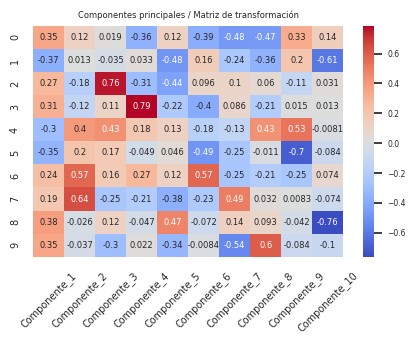

In [ ]:
#Mostramos df_componentes con un mapa de calor
fig,ax = plt.subplots(figsize=(5,3))
sns.set(font_scale=0.5)
sns.heatmap(df_componentes,cmap='coolwarm',annot=True,ax=ax)
plt.title('Componentes principales / Matriz de transformación')
plt.xticks(rotation=45,size=7)
plt.yticks(size=7)
plt.show()

Ahora si tenemos la matriz de tranformación donde cada columna son los pesos de los componentes

Graficamos la varianza expliaca por cada componente y la varianza acumulada de los componentes

Varianza explicada por el componente 1: 0.60443
Varianza explicada por el componente 2: 0.13787
Varianza explicada por el componente 3: 0.06734
Varianza explicada por el componente 4: 0.05114
Varianza explicada por el componente 5: 0.03742
Varianza explicada por el componente 6: 0.03108
Varianza explicada por el componente 7: 0.02892
Varianza explicada por el componente 8: 0.02336
Varianza explicada por el componente 9: 0.01401
Varianza explicada por el componente 10: 0.00444

----------------------------------------------------------------------------------------------------

Varianza acumulada por los primeros 1 componentes : 0.60443
Varianza acumulada por los primeros 2 componentes : 0.74230
Varianza acumulada por los primeros 3 componentes : 0.80964
Varianza acumulada por los primeros 4 componentes : 0.86078
Varianza acumulada por los primeros 5 componentes : 0.89820
Varianza acumulada por los primeros 6 componentes : 0.92928
Varianza acumulada por los primeros 7 componentes : 0.95

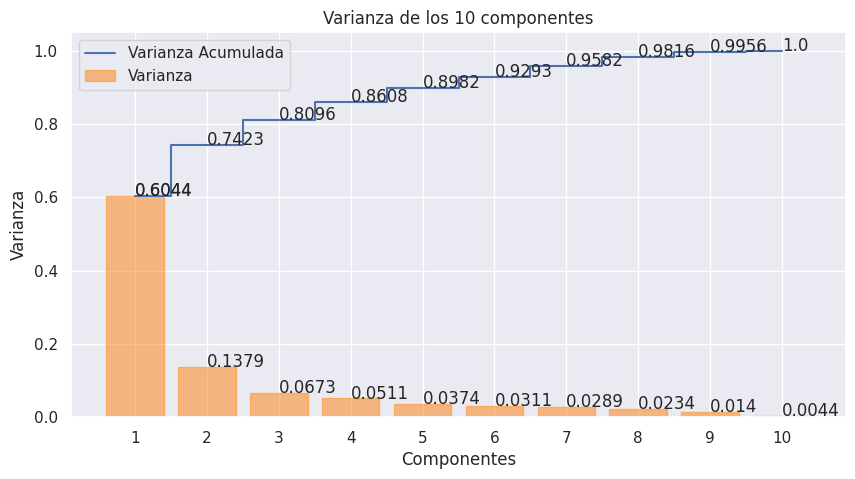

In [ ]:
#Hacemos el grafico de barras y de escalera de la varianza de los componentes
plt.figure(figsize=(10,5))
#Mostramos grafica de barras con un borde naranja oscuro
var_explicada = eigenvalues/np.sum(eigenvalues)
#Ordenamos var_explicada de forma descendente y varianza acumulada
var_explicada = np.sort(var_explicada)[::-1]
var_acumulada = np.cumsum(var_explicada)

for i in range(len(var_explicada)):
  print(f'Varianza explicada por el componente {i+1}: {var_explicada[i]:.5f}')

print('\n' + '-'*100 + '\n')
for i in range(len(var_acumulada)):
  print(f'Varianza acumulada por los primeros {i+1} componentes : {var_acumulada[i]:.5f}')

#Graficamos
plt.bar(range(1,11),var_explicada,alpha=0.5,align='center',label='Varianza',color='tab:orange',edgecolor='darkorange')
plt.step(range(1,11),var_acumulada,where='mid',label='Varianza Acumulada')


#Hacemos que se muestre la varianza en cada columna de la grafica
for i in range(10):
    plt.text(i+1,var_explicada[i],round(var_explicada[i],4))
    plt.text(i+1,var_acumulada[i],round(var_acumulada[i],4))

#Modificamos los x_ticks para mostrar todos los números del 1 al 10
plt.xticks(range(1,11))

plt.grid(True)
plt.title('Varianza de los 10 componentes')
plt.ylabel('Varianza')
plt.xlabel('Componentes')
plt.legend(loc='best')
plt.show()

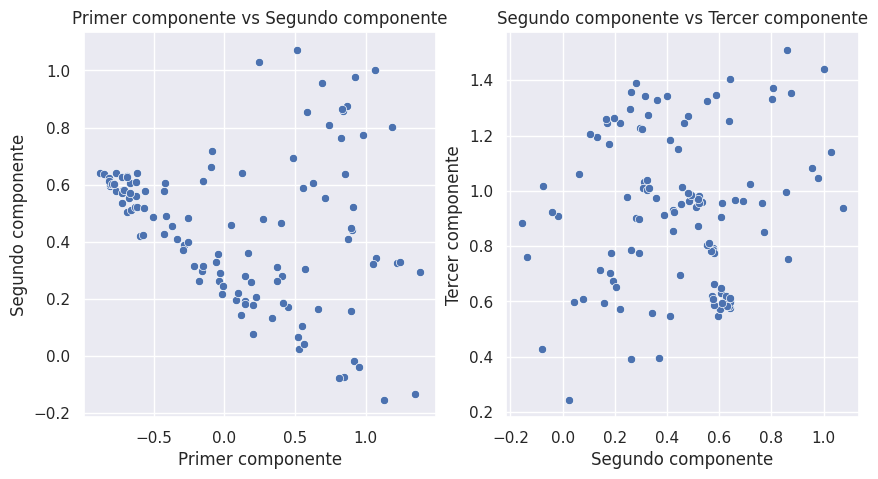

In [ ]:
#Calculamos los primeros tres componentes
componente_1 = np.array([])
componente_2 = np.array([])
componente_3 = np.array([])

for i in range(len(df)):
  componente_1 = np.append(componente_1,np.dot(pd_eigenvectores.loc[:,pd_indices[0].values].iloc[:,0],df.iloc[i]))
  componente_2 = np.append(componente_2,np.dot(pd_eigenvectores.loc[:,pd_indices[0].values].iloc[:,1],df.iloc[i]))
  componente_3 = np.append(componente_3,np.dot(pd_eigenvectores.loc[:,pd_indices[0].values].iloc[:,2],df.iloc[i]))

#Grafico de dispersión componente 1 vs 2 y 2 vs 3
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.set(font_scale=1)
sns.scatterplot(x=componente_1,y=componente_2,ax=ax[0])
ax[0].set_title('Primer componente vs Segundo componente')
ax[0].set_xlabel('Primer componente')
ax[0].set_ylabel('Segundo componente')

sns.scatterplot(x=componente_2,y=componente_3,ax=ax[1])
ax[1].set_title('Segundo componente vs Tercer componente')
ax[1].set_xlabel('Segundo componente')
ax[1].set_ylabel('Tercer componente')
plt.show()

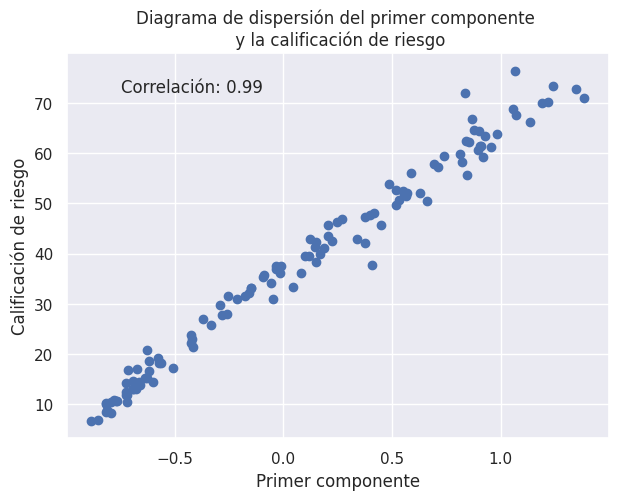

In [ ]:
#Calculo de correlación entre primer componente y calificacion de riesgo
correlacion = np.corrcoef(calificacion_riesgo,componente_1)
correlacion = correlacion[0,1]


#Grafico de dispersión de componente_1 y calificacion_riesgo
fig,ax = plt.subplots(figsize=(7,5))
sns.set(font_scale=1)
plt.scatter(componente_1,calificacion_riesgo)

plt.title('Diagrama de dispersión del primer componente \n y la calificación de riesgo')
plt.xlabel('Primer componente')
plt.ylabel('Calificación de riesgo')

#Mostramos la correlación entre ambas variables
plt.text(0.1,0.9,f'Correlación: {correlacion:.2f}',transform=plt.gca().transAxes)
plt.show()